# Project on Prediction of Profits for the Startups

### Importing necessary Libraries

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [3]:
#importing dataset
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Check if there is any missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


##### OUR MEAN AND 50 % IS EVENLY MATCHED SO OUR DATA IS UNIFORMLY DISTRIBUTED

# EDA

<AxesSubplot:>

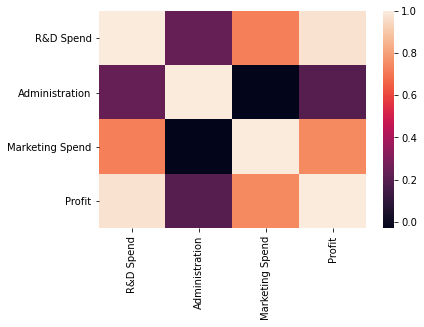

In [6]:
sns.heatmap(data.corr())

In [7]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<AxesSubplot:ylabel='R&D Spend'>

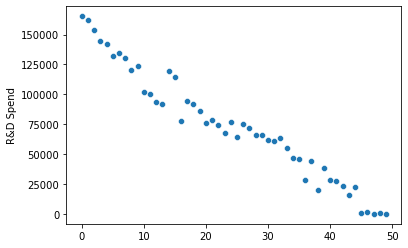

In [8]:
sns.scatterplot(data=data['R&D Spend'])

<AxesSubplot:ylabel='Administration'>

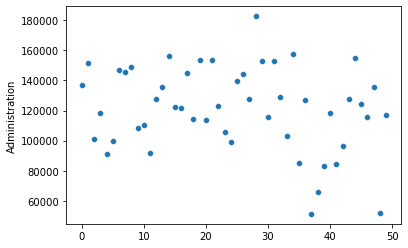

In [9]:
sns.scatterplot(data=data['Administration'])

<AxesSubplot:ylabel='Marketing Spend'>

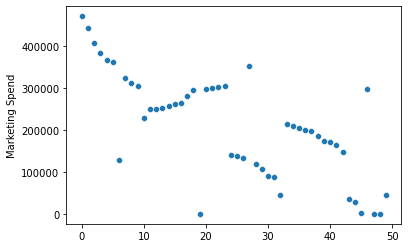

In [10]:
sns.scatterplot(data=data['Marketing Spend'])

<AxesSubplot:ylabel='Profit'>

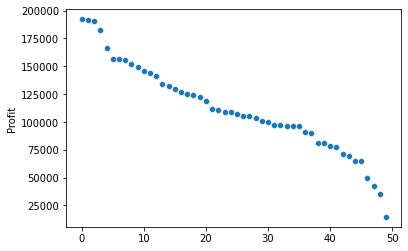

In [11]:
sns.scatterplot(data=data['Profit'])

<AxesSubplot:ylabel='Profit'>

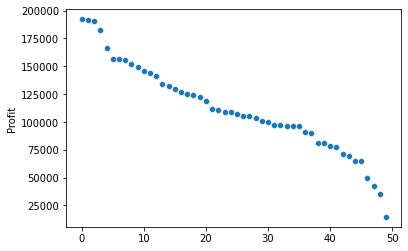

In [12]:
sns.scatterplot(data=data['Profit'])

In [13]:
data['State']=data['State'].map({'Florida':0,'California':1,'New York':2})
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,0,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,0,166187.94


### Prepare the dataset for splitting into training and testing

In [14]:
#Independent variable
features = data.iloc[:,:-1].values
#Dependent Variable
target = data.iloc[:,[-1]].values

In [15]:
#Display the independent variables array read into the single variable
features

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 2.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 2.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 2.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 2.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 1.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 0.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 1.0000000e+00],
       [9.3863750e+04, 1.2732038e+05, 2.4983944e+05, 0.0000000e+00],
       [9.1992390e+04, 1.3549507e+05, 2.5266493e+05, 1.0000000e+00],
       [1.1994324e+05, 1.5654742e+

### Preprocessing

In [16]:
#convert the categorical values to numerical values as 
#sklearn works only with numpy array
#Instead of label encoding and then onehotencoding, 
#newer version directly works with onehotencoding using ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
features = transformer.fit_transform(features.tolist())
#Newly transformed independant variables
features

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 1.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 1.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 1.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 1.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 1.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [17]:
#converting an object to normal array
features = features.astype(float)

In [18]:
features

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [0.0000000e+00, 1.0000000e+00,

In [19]:
#sampling the dataset
#normally 33% dataset is used for testing and 67% is used for training and test_size=0.33 means 33%  
#Training set will be used to train the model
#Create Training and Testing sets
# Testing set will be used to test our model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                target,
                                                test_size=0.33,
                                                random_state=1)

### Implement a Decision_Tree_Regressor to make predictions



In [20]:
#Create our model using Linear Regression
from sklearn.tree import DecisionTreeRegressor
#Learning the model using the training data
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [21]:
#checking score of training as well as testing
print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))

0.9781110991868383
0.8260063871583283


In [22]:
#Predict based on the DecisionTreeRegressor model
dtr_pred = DTR.predict(X_test)
# Compare actual and predicted values
df_dtr = pd.DataFrame({'Real Profit Values':y_test.reshape(-1), 'Predicted Profit Values':dtr_pred.reshape(-1)})
df_dtr

,Real Profit Values,Predicted Profit Values
0,105008.31,108933.224286
1,96479.51,95844.612500
2,78239.91,69421.055000
3,81229.06,69421.055000
4,191050.39,192026.945000
5,182901.99,166187.940000
6,35673.41,42559.730000
7,101004.64,108933.224286
8,49490.75,69421.055000
9,97483.56,95844.612500


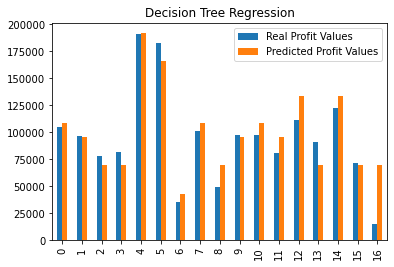

In [23]:
df_dtr.plot.bar(title='Decision Tree Regression')
plt.show()

Model is not generalized yet. You may check for other values of max_depth.


In [24]:
#Create our model using Linear Regression
from sklearn.tree import DecisionTreeRegressor
#Learning the model using the training data
m_depth = [3,5,7,9]
for i in m_depth:
  DTR = DecisionTreeRegressor(max_depth=i)
  DTR.fit(X_train,y_train)
  print("DecisionTreeRegressor - Max_depth:",i)
  print(DTR.score(X_train,y_train))
  print(DTR.score(X_test,y_test))

DecisionTreeRegressor - Max_depth: 3
0.9781110991868383
0.8260063871583283
DecisionTreeRegressor - Max_depth: 5
0.9994952962786883
0.8121193445223508
DecisionTreeRegressor - Max_depth: 7
1.0
0.8345116785524892
DecisionTreeRegressor - Max_depth: 9
1.0
0.828400703210247


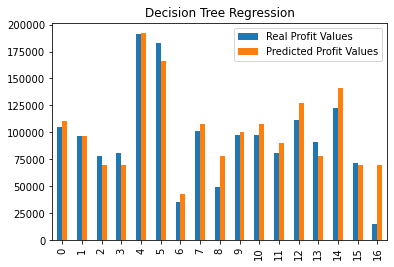

In [25]:
#Predict based on the DecisionTreeRegressor model
dtr_pred = DTR.predict(X_test)
# Compare actual and predicted values
df_dtr = pd.DataFrame({'Real Profit Values':y_test.reshape(-1), 'Predicted Profit Values':dtr_pred.reshape(-1)})
df_dtr.plot.bar(title='Decision Tree Regression')
plt.show()

### Implement a Random_Forest_Regressor to make predictions



In [26]:
#Import Random forest library
from sklearn.ensemble import RandomForestRegressor
#Implement Random forest Regressor with number of trees in the forest:3
RF=RandomForestRegressor(n_estimators=5)
#Fit the training data
RF.fit(X_train,y_train.ravel())
#Compare the scores
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

0.9869176910853275
0.8503199981914862


In [27]:
#Predict based on the RandonForestRegressor model
rf_pred = RF.predict(X_test)
# Compare actual and predicted values
df = pd.DataFrame({'Real Profit Values':y_test.reshape(-1), 'Predicted Profit Values':rf_pred.reshape(-1)})
df

,Real Profit Values,Predicted Profit Values
0,105008.31,113240.920
1,96479.51,95373.292
2,78239.91,74493.252
3,81229.06,75859.208
4,191050.39,179898.956
5,182901.99,161553.342
6,35673.41,64924.658
7,101004.64,97700.366
8,49490.75,71962.822
9,97483.56,92990.138


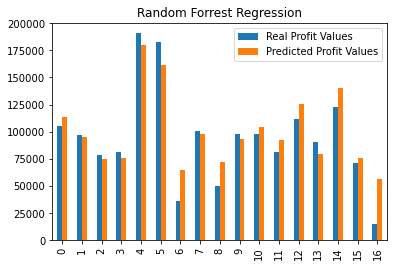

In [28]:
df.plot.bar(title='Random Forrest Regression')
plt.show()

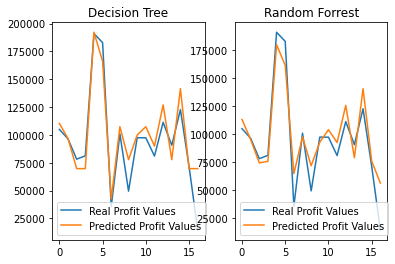

In [29]:
#Comapre Decision Tree Regressor with Random Forrest regressor
fig, axes = plt.subplots(nrows=1, ncols=2)
df_dtr.plot(ax=axes[0], title='Decision Tree')
df.plot(ax=axes[1], title='Random Forrest')
plt.show()

### Implement a Random_Forest_Regressor to make predictions 

In [30]:
from sklearn.ensemble import RandomForestRegressor
#Change and output the score of an added tree to the forest
df_all = []
for i in range(6,10):
    RF=RandomForestRegressor(n_estimators=i)
    RF.fit(X_train,y_train.ravel())
    print("\nn_estimator = ",i)
    print("Training Score =",RF.score(X_train,y_train))
    print("Testing Score = ",RF.score(X_test,y_test))
    #Predict based on the RandonForestRegressor model
    rf_pred = RF.predict(X_test)
    # Compare actual and predicted values
    df = pd.DataFrame({'Real Profit Values':y_test.reshape(-1), 'Predicted Profit Values':rf_pred.reshape(-1)})
    df_all.append(df)
    print("\n", df, "\n")
    


n_estimator =  6
Training Score = 0.9496377704572846
Testing Score =  0.8180212042307763

     Real Profit Values  Predicted Profit Values
0            105008.31            110866.425000
1             96479.51            102184.710000
2             78239.91             70919.380000
3             81229.06             75578.673333
4            191050.39            167183.266667
5            182901.99            162915.913333
6             35673.41             52160.638333
7            101004.64             99860.226667
8             49490.75             84301.653333
9             97483.56             99302.761667
10            97427.84             95045.003333
11            81005.76             93098.861667
12           111313.02            120421.236667
13            90708.19             75422.703333
14           122776.86            131977.856667
15            71498.49             75699.080000
16            14681.40             65046.196667 


n_estimator =  7
Training Score = 0.98350

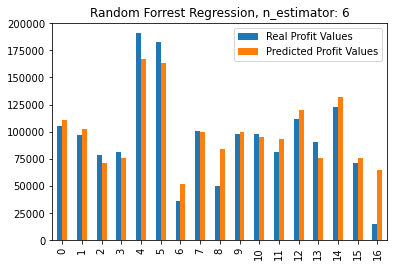

In [31]:
df_all[0].plot.bar(title='Random Forrest Regression, n_estimator: 6')
plt.show()

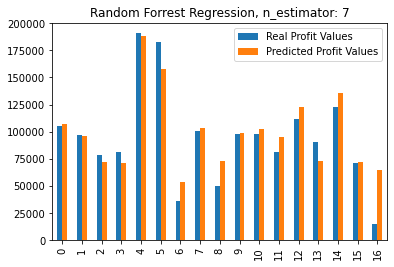

In [32]:
df_all[1].plot.bar(title='Random Forrest Regression, n_estimator: 7')
plt.show()

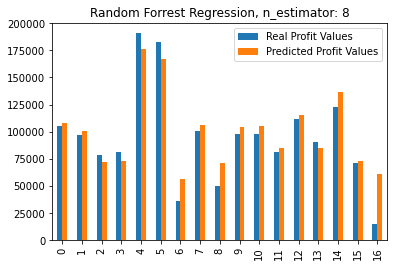

In [33]:
df_all[2].plot.bar(title='Random Forrest Regression, n_estimator: 8')
plt.show()

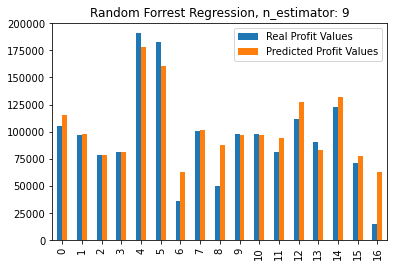

In [34]:
df_all[3].plot.bar(title='Random Forrest Regression, n_estimator: 9')
plt.show()

## A bunch of predictions have been made on different amounts of trees in the forests and with an comparrison between Decision Tree and Random Forest Regression.
To my conclusion I believe Random Forrest Regression with amount of 8 decision trees in the forest is going to be the best at prediction future profit of each of the startups.